# Load Wisconsin Breast Cancer Dataset

In [1]:
%run setup.ipynb

from sklearn.datasets import load_breast_cancer

# load data
data = load_breast_cancer()
X = data.data
y = data.target
print(X.shape, data.feature_names)

(569, 30) ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


# Classification Model Evaluation Metrics

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(398, 30) (171, 30)


In [3]:
y[:3]

array([0, 0, 0])

In [4]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression()
logistic.fit(X_train,y_train)

C:\Users\Elisabetta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Confusion Matrix

In [5]:
import model_evaluation_utils as meu

y_pred = logistic.predict(X_test)
meu.display_confusion_matrix(true_labels=y_test, predicted_labels=y_pred, classes=[0, 1])

          Predicted_0  Predicted_1
Actual_0           59            4
Actual_1            1          107


## True Positive, False Positive, True Negative and False Negative

In [6]:
positive_class = 1
TP = 106
FP = 4
TN = 59
FN = 2

## Accuracy

In [7]:
fw_acc = round(meu.metrics.accuracy_score(y_true=y_test, y_pred=y_pred), 5)
mc_acc = round((TP + TN) / (TP + TN + FP + FN), 5)
print('Framework Accuracy:', fw_acc)
print('Manually Computed Accuracy:', mc_acc)

Framework Accuracy: 0.97076
Manually Computed Accuracy: 0.96491


## Precision

In [8]:
fw_prec = round(meu.metrics.precision_score(y_true=y_test, y_pred=y_pred), 5)
mc_prec = round((TP) / (TP + FP), 5)
print('Framework Precision:', fw_prec)
print('Manually Computed Precision:', mc_prec)

Framework Precision: 0.96396
Manually Computed Precision: 0.96364


## Recall

In [9]:
fw_rec = round(meu.metrics.recall_score(y_true=y_test, y_pred=y_pred), 5)
mc_rec = round((TP) / (TP + FN), 5)
print('Framework Recall:', fw_rec)
print('Manually Computed Recall:', mc_rec)

Framework Recall: 0.99074
Manually Computed Recall: 0.98148


## F1-Score

In [10]:
fw_f1 = round(meu.metrics.f1_score(y_true=y_test, y_pred=y_pred), 5)
mc_f1 = round((2*mc_prec*mc_rec) / (mc_prec+mc_rec), 5)
print('Framework F1-Score:', fw_f1)
print('Manually Computed F1-Score:', mc_f1)

Framework F1-Score: 0.97717
Manually Computed F1-Score: 0.97248


## ROC Curve and AUC

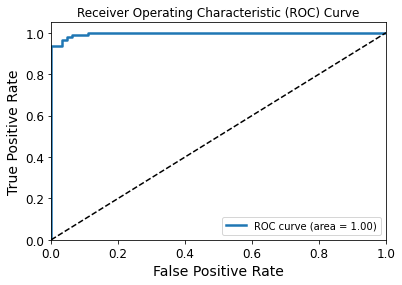

In [11]:
meu.plot_model_roc_curve(clf=logistic, features=X_test, true_labels=y_test)